Recharge plan generation:

A Telecom company operates in various regions of the country and these regions are idetified as circles. Th company maintains the details of all its customers and their services. It has various requirements for which we need to genearte reports.

1. To generate service file usage per circle on monthly basis.

2. To generate service file usage per customer on monthly basis.

3. To suggest an appropriate recharge plan to the customer based on his service usage for his upcoming month.

1. Importing Libraries and Packages

  First_step : To export all the necessary packages. In machine learning terms it’s called – EDA (exploratory Data Analysis)

In [31]:

import pandas as pd
import os
from matplotlib import pyplot as ply


In [32]:
print(os.listdir("C:/Users/mkiranmayi/Desktop/recharge_plan"))

['master_data.xlsx', 'monthly_data.xlsx']


2. Loading and Viewing Data Set

Now we are loading our datasets into pandas framework.
    
  1. recharge dataset into daily_data.
  2. master_file dataset into master_file_data

In [35]:
master_data = pd.read_excel('C:/Users/mkiranmayi/Desktop/recharge_plan/master_data.xlsx')    
daily_data = pd.read_excel('C:/Users/mkiranmayi/Desktop/recharge_plan/monthly_data.xlsx')
                           

Now to check whether our datasets are correctly loaded or not. we use head() which displays the first five rows of pandas framework 

In [36]:
master_data.head()

,Unnamed: 0,plan_id,voice_usage,data_usage,roaming_percentage,amount
0,0,RC07,100,500,30,70
1,1,RC28,200,1000,30,280
2,2,RC44,300,1500,0,440
3,3,RC01,100,0,0,10
4,4,RC02,100,500,0,20


In [37]:
daily_data.head()

,Unnamed: 0,phone_number,data_usage,voice_usage,Home_circle,Active_circle,no_of_calls,calls_connected
0,0,9876543210,1380,120,Telangana,Maharashtra,12,10
1,1,8876553210,400,120,Maharashtra,Maharashtra,19,11
2,2,7876553210,1500,180,Punjab,Karanataka,77,67
3,3,7876553210,800,157,Maharashtra,Karanataka,20,17
4,4,8886553210,1234,111,Karnataka,Kolkata,89,80


Now we are able to see the first five rows of daily_data and master_file data.

 We can also find the columns in a dataset by using keys() method.

In [61]:
print('columns of master_file are:')
print(master_data.keys())
print('columns of daily_data_file are:')
print(daily_data.keys())

columns of master_file are:
Index(['Unnamed: 0', 'plan_id', 'voice_usage', 'data_usage',
       'roaming_percentage', 'amount'],
      dtype='object')
columns of daily_data_file are:
Index(['Unnamed: 0', 'phone_number', 'data_usage', 'voice_usage',
       'Home_circle', 'Active_circle', 'no_of_calls', 'calls_connected',
       'Roaming_flag', 'call_drop'],
      dtype='object')




Finding the numerical columns using dtype attributes.

Getting the stastical summary of master_data to understand the variables, so that it will give good insight about our numerical columns.

Here we are not able to see any numerical columns in our daily_data dataset.

For that we use decribe() method 

In [39]:
daily_data.describe()

,Unnamed: 0,phone_number,data_usage,voice_usage,no_of_calls,calls_connected
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,2.500000,8.713218e+09,919.000000,131.333333,39.833333,32.833333
std,1.870829,7.536724e+08,538.477483,30.591938,33.819620,31.858542
min,0.000000,7.876553e+09,200.000000,100.000000,12.000000,10.000000
25%,1.250000,8.126553e+09,500.000000,113.250000,19.250000,11.250000
50%,2.500000,8.881553e+09,1017.000000,120.000000,21.000000,14.500000
75%,3.750000,8.886553e+09,1343.500000,147.750000,63.250000,54.500000
max,5.000000,9.876543e+09,1500.000000,180.000000,89.000000,80.000000


We are calculating the Roaming_flag. 

 Roaming_flag is set to 'Y' when home_circle and active_circle differs.
 
 Roaming_flag is set to 'N' when home_circle and active_circle is same.


In [40]:

daily_data.loc[daily_data.Home_circle != daily_data.Active_circle, 'Roaming_flag'] = 'Y'
daily_data.loc[daily_data.Home_circle == daily_data.Active_circle, 'Roaming_flag'] = 'N'
print(daily_data)

   Unnamed: 0  phone_number  data_usage  voice_usage  Home_circle  \
0           0    9876543210        1380          120    Telangana   
1           1    8876553210         400          120  Maharashtra   
2           2    7876553210        1500          180       Punjab   
3           3    7876553210         800          157  Maharashtra   
4           4    8886553210        1234          111    Karnataka   
5           5    8886553210         200          100      Kolkata   

  Active_circle  no_of_calls  calls_connected Roaming_flag  
0   Maharashtra           12               10            Y  
1   Maharashtra           19               11            N  
2    Karanataka           77               67            Y  
3    Karanataka           20               17            Y  
4       Kolkata           89               80            Y  
5    Karanataka           22               12            Y  


Now we can see that 'Roaming_flag' is added to our daily_data.

To calculate data_usage,voice_usage, roaming_percentange per user of all the circles.

In [41]:

user_data = daily_data.groupby(['phone_number']).agg({'data_usage' : 'sum','voice_usage': 'sum','Roaming_flag' : lambda val : (val == 'Y').count(),'no_of_calls' : 'sum'})


Here we are using lambda function for calculating the count of Roaming_flag whose value is 'Y'. The lambdda function in python is very small and contains only one expression. The result of this expression is value which is appiled by the lambda to the argument.

In [42]:

user_data['roaming_percentage'] = (user_data['Roaming_flag'] /user_data['no_of_calls']) * 100

We are calculating roaming_percentage by dividing Roaming_flag with no_of_calls.

In [43]:
user_data.reset_index(inplace=True)

For user_report, we need data_usage, voice_usage, roaming_percentage columns, so we are copying those columns from user dataframe.

In [44]:
user_report = user_data[['phone_number','data_usage','voice_usage','roaming_percentage']].copy()
print(user_report)

   phone_number  data_usage  voice_usage  roaming_percentage
0    7876553210        2300          337            2.061856
1    8876553210         400          120            5.263158
2    8886553210        1434          211            1.801802
3    9876543210        1380          120            8.333333


Now, we can able to see the user report of all the circles.

To calculate call_drop_percentage per circle of all the home circles.


In [45]:
daily_data['call_drop'] = ((daily_data['no_of_calls'] - daily_data['calls_connected'])/daily_data['no_of_calls']) * 100

To calculate data_usage, voice_usage per circle of all the circles.

In [46]:
circle_report = daily_data.groupby('Home_circle').agg({'data_usage' : 'sum','voice_usage': 'sum','call_drop' : 'sum' })

In [47]:
print(circle_report.round({'call_drop' : 2}))

             data_usage  voice_usage  call_drop
Home_circle                                    
Karnataka          1234          111      10.11
Kolkata             200          100      45.45
Maharashtra        1200          277      57.11
Punjab             1500          180      12.99
Telangana          1380          120      16.67


In [48]:
circle_report.reset_index(inplace=True)
print(circle_report)

   Home_circle  data_usage  voice_usage  call_drop
0    Karnataka        1234          111  10.112360
1      Kolkata         200          100  45.454545
2  Maharashtra        1200          277  57.105263
3       Punjab        1500          180  12.987013
4    Telangana        1380          120  16.666667


Now , we can able to see the circle_report of all the four circles. Here, we are using round function to round the call_drop upto 2 decimals.

 Business has provided a master_file which contains from which we have to suggest a recharge plan.

In [49]:
master_data.head()

,Unnamed: 0,plan_id,voice_usage,data_usage,roaming_percentage,amount
0,0,RC07,100,500,30,70
1,1,RC28,200,1000,30,280
2,2,RC44,300,1500,0,440
3,3,RC01,100,0,0,10
4,4,RC02,100,500,0,20


This is the master_file which contains the permutations and combinations of a the service volumes.

  The volume is in multiples of 100 and, capped to 300 for voice service.
  
  Similarly, the volume is in multiples of 500 and, capped to 2000 for data service.
  
  Also the percentage slab for raoming service is 30, and capped to 90.
  


In [50]:

cap_data = user_report

In [51]:
print(cap_data)

   phone_number  data_usage  voice_usage  roaming_percentage
0    7876553210        2300          337            2.061856
1    8876553210         400          120            5.263158
2    8886553210        1434          211            1.801802
3    9876543210        1380          120            8.333333



We are copying the above columns from user dataframe to the cap_data dataframe.


So, as per the requirement now we have to set caps to the data to suggest a recharge plan to the customer using master_file.

In [52]:

cap_data.loc[cap_data.voice_usage  <= 100,'voice_usage'] = 100
cap_data.loc[(cap_data.voice_usage  > 100) & (cap_data.voice_usage <= 200),'voice_usage'] = 200
cap_data.loc[cap_data.voice_usage  > 200,'voice_usage'] = 300

The total monthly voice service used by the customer should be rounded to the nearest 100 and a cap should be set to 300.

In [53]:
cap_data.loc[cap_data.data_usage  <= 500,'data_usage'] = 500
cap_data.loc[(cap_data.data_usage  > 500) & (cap_data.data_usage <= 1000),'data_usage'] = 1000
cap_data.loc[(cap_data.data_usage  > 1000) & (cap_data.data_usage <= 1500),'data_usage'] = 1500
cap_data.loc[cap_data.data_usage  > 1500,'data_usage'] = 2000

The monthly data service used by the customer should be rounded to the nearest 500 and a cap should be set to 2000.

In [54]:
cap_data.loc[cap_data.roaming_percentage  <=int(30),'roaming_percentage'] = int(30)
cap_data.loc[(cap_data.roaming_percentage  > int(30)) & (cap_data.roaming_percentage <= int(60)),'voice_usage'] = int(60)
cap_data.loc[cap_data.roaming_percentage  > int(60),'voice_usage'] = int(90)


Similarly roaming_percentage should be rounded to nearest 30 and a cap is set to 90.

In [55]:

print(cap_data)

   phone_number  data_usage  voice_usage  roaming_percentage
0    7876553210        2000          300                30.0
1    8876553210         500          200                30.0
2    8886553210        1500          300                30.0
3    9876543210        1500          200                30.0


This is the capped data.

In [56]:

recharge_plan_gen = pd.merge(left=master_data,right=cap_data,left_on=['data_usage','voice_usage','roaming_percentage'], right_on=['data_usage','voice_usage','roaming_percentage'])



Here, I am using merge operation which  acts with an “inner” merge or "inner" join. An inner merge, (or inner join) keeps only the common values in both the left and right dataframes. 

I am taking data_usage, voice_usage, roaming_percentage as my keys, if those keys matches, it will suggest an appropriate recharge plan to the customer from master_file.

In [57]:
generated_plan = recharge_plan_gen[['phone_number','plan_id','amount']].copy()
print(generated_plan)

   phone_number plan_id  amount
0    8876553210    RC27     270
1    9876543210    RC29     290
2    8886553210    RC49     490
3    7876553210    RC50     500


Now, based on his/her service usage we have suggested  a recharge  plan to the customer for his upcoming month. 

In [58]:
export_recharge_plan_gen = generated_plan.to_excel(r'C:\Users\mkiranmayi\Desktop\recharge_plan_gen.xlsx')
export_user_report = user_report.to_excel(r'C:\Users\mkiranmayi\Desktop\user_report.xlsx')
export_circle_report = circle_report.to_excel(r'C:\Users\mkiranmayi\Desktop\circle_report.xlsx')

Finally, we are exporting reports to desktop.

Text(0.5, 1.0, 'Service usage representation per circle')

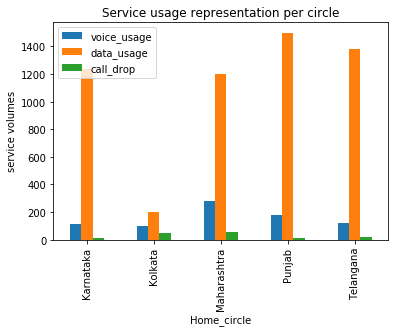

In [59]:
ax = circle_report.plot.bar(x = 'Home_circle', y = ['voice_usage','data_usage','call_drop'])
ply.ylabel('service volumes')
ply.title('Service usage representation per circle')
                            

Data visualization is the easiest way to analyze and absorb information. They help in identifying patterns, relationships, and outliers in data. It helps in understanding business problems better and quickly.